#**YOLOv3**
* DaNang,24/06/2022 1:13 PM
* By LeoGino
* Contact: leo18gino@gmail.com
* Papers:

**Step 1:** Create Darknet

In [4]:
!rm -rf darknet
%cd /content/drive/MyDrive/YOLOv3
!git clone https://github.com/AlexeyAB/darknet
%cd /content/drive/MyDrive/YOLOv3/darknet
!rm -rf data

/content/drive/MyDrive/YOLOv3
fatal: destination path 'darknet' already exists and is not an empty directory.
/content/drive/MyDrive/YOLOv3/darknet


In [5]:
!ls

3rdparty	DarknetConfig.cmake.in	include		       README.md
backup		darknet_images.py	json_mjpeg_streams.sh  results
build		darknet.py		LICENSE		       scripts
build.ps1	darknet_video.py	Makefile	       src
cfg		Data			net_cam_v3.sh	       vcpkg.json
cmake		image_yolov3.sh		net_cam_v4.sh	       video_yolov3.sh
CMakeLists.txt	image_yolov4.sh		obj		       video_yolov4.sh


**Step 2:** Setup GPU

In [6]:
!sed -i 's/GPU=0/GPU=1/g' Makefile
!sed -i 's/OPENCV=0/OPENCV=1/g' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/g' Makefile
!make

chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_opencv.cpp:1150:10: note: ...thi

**Step 3:** Download file weight

In [8]:
!wget https://pjreddie.com/media/files/yolov3.weights

--2022-06-24 06:41:12--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  56.5MB/s    in 4.2s    

2022-06-24 06:41:16 (56.2 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



**Step 4:** Detect

In [11]:
!pwd
%cd /content/drive/MyDrive/YOLOv3/darknet/
!chmod +x ./darknet
!./darknet detect /content/drive/MyDrive/YOLOv3/darknet/cfg/yolov3.cfg /content/drive/MyDrive/YOLOv3/darknet/yolov3.weights /content/drive/MyDrive/YOLOv3/darknet/data/traffic.jpg

/content/drive/MyDrive/YOLOv3/darknet
/content/drive/MyDrive/YOLOv3/darknet
 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/

**Step 5:** Show result and compare with YOLOv1 and YOLOv2

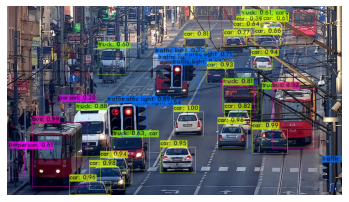

In [15]:
import cv2
import matplotlib.pyplot as plt
import os.path
fig,ax = plt.subplots()
ax.tick_params(labelbottom="off",bottom="off")
ax.tick_params(labelleft="off",left="off")
ax.set_xticklabels([])
ax.axis('off')
file = '/content/drive/MyDrive/YOLOv3/darknet/predictions.jpg'
if os.path.exists(file):
  img3 = cv2.imread(file)
  show_img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
  plt.imshow(show_img3)

YOLOv2

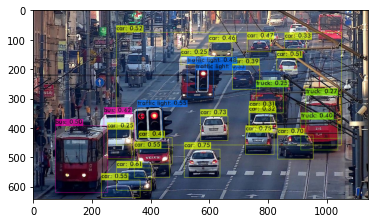

In [17]:
file = '/content/drive/MyDrive/YOLOv2/darknet/predictions.jpg'
if os.path.exists(file):
  img2 = cv2.imread(file)
  show_img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
  plt.imshow(show_img2)

YOLOv1

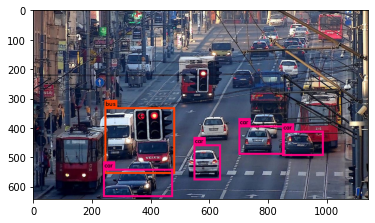

In [18]:
file = '/content/drive/MyDrive/YOLOv1/darknet/predictions.jpg'
if os.path.exists(file):
  img1 = cv2.imread(file)
  show_img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
  plt.imshow(show_img1)